In [23]:
import pandas as pd
import pandas as pd
import torch
import faiss
from transformers import pipeline
from sentence_transformers import SentenceTransformer

In [26]:
df = pd.read_csv("Dataset/TMDB10K.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10001 non-null  int64  
 1   title                 10001 non-null  object 
 2   release_date          9978 non-null   object 
 3   genres                10001 non-null  object 
 4   original_language     10000 non-null  object 
 5   vote_average          10000 non-null  float64
 6   vote_count            10000 non-null  float64
 7   popularity            10000 non-null  float64
 8   overview              9924 non-null   object 
 9   budget                9999 non-null   float64
 10  production_companies  9999 non-null   object 
 11  revenue               9999 non-null   float64
 12  runtime               9999 non-null   float64
 13  tagline               7383 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 1.1+ MB


In [27]:
df.head()

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,385687,Fast X,17-05-2023,"['Action', 'Crime', 'Thriller']",English,7.4,1347.0,8363.473,Over many missions and against impossible odds...,340000000.0,"['Universal Pictures', 'Original Film', 'One R...",6.520000e+08,142.0,The end of the road begins.
1,603692,John Wick: Chapter 4,22-03-2023,"['Action', 'Thriller', 'Crime']",English,7.9,2896.0,4210.313,"With the price on his head ever increasing, Jo...",90000000.0,"['Thunder Road', '87Eleven', 'Summit Entertain...",4.317692e+08,170.0,"No way back, one way out."
2,502356,The Super Mario Bros. Movie,05-04-2023,"['Animation', 'Family', 'Adventure', 'Fantasy'...",English,7.8,4628.0,3394.458,"While working underground to fix a water main,...",100000000.0,"['Universal Pictures', 'Illumination', 'Ninten...",1.308767e+09,92.0,NaN
3,569094,Spider-Man: Across the Spider-Verse,31-05-2023,"['Action', 'Adventure', 'Animation', 'Science ...",English,8.8,1160.0,2859.047,"After reuniting with Gwen Stacy, Brooklyn’s fu...",100000000.0,"['Columbia Pictures', 'Sony Pictures Animation...",3.135222e+08,140.0,It's how you wear the mask that matters
4,536437,Hypnotic,11-05-2023,"['Mystery', 'Thriller', 'Science Fiction']",English,6.5,154.0,2654.854,A detective becomes entangled in a mystery inv...,70000000.0,"['Studio 8', 'Solstice Productions', 'Ingeniou...",0.000000e+00,94.0,Control is an illusion.


In [28]:
df['description_length'] = df["overview"].str.split(" ").str.len()

In [29]:
df['budget_revenue_ratio'] = df.apply(lambda row:  row['revenue'] / row['budget']  if row['budget'] != 0 else None, axis=1)

In [30]:
df['vote_share'] = df.apply(lambda row:  row['vote_average'] * row['vote_count']  , axis=1)

In [31]:
df.columns

Index(['id', 'title', 'release_date', 'genres', 'original_language',
       'vote_average', 'vote_count', 'popularity', 'overview', 'budget',
       'production_companies', 'revenue', 'runtime', 'tagline',
       'description_length', 'budget_revenue_ratio', 'vote_share'],
      dtype='object')

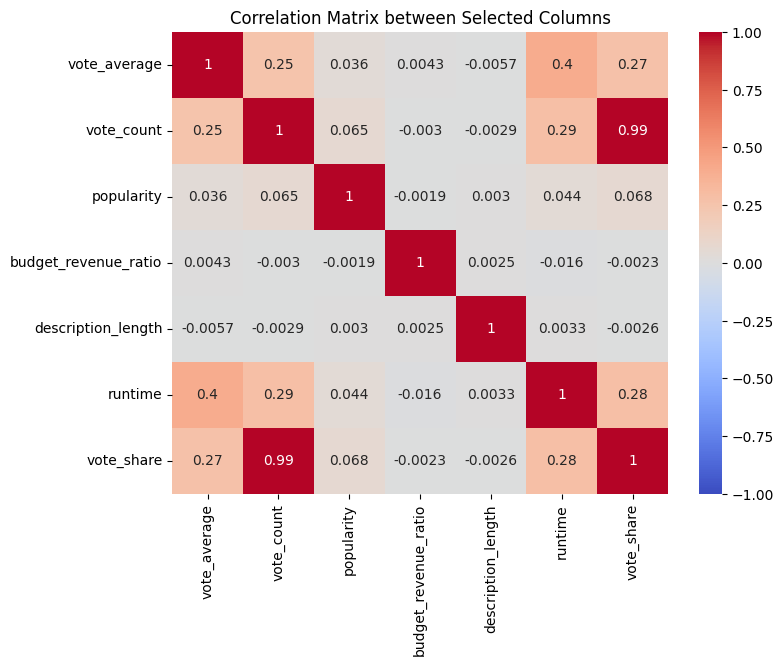

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select the columns for correlation (e.g., vote_average, popularity, budget_revenue_ratio)
selected_columns = ['vote_average', 'vote_count' ,'popularity', 'budget_revenue_ratio','description_length','runtime','vote_share']

# Compute the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.title("Correlation Matrix between Selected Columns")
plt.show()


In [33]:
def add_years_old_column(df: pd.DataFrame) -> pd.DataFrame:
    # Ensure release_date is in datetime format
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

    # Extract the release year
    df['year'] = df['release_date'].dt.year

    # Calculate years_old
    df['years_old'] = abs(df['year'] - 2023)

    return df

df = add_years_old_column(df)
df.head(4)

C:\Users\Saket\AppData\Local\Temp\ipykernel_11244\550060221.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,description_length,budget_revenue_ratio,vote_share,year,years_old
0,385687,Fast X,2023-05-17,"['Action', 'Crime', 'Thriller']",English,7.4,1347.0,8363.473,Over many missions and against impossible odds...,340000000.0,"['Universal Pictures', 'Original Film', 'One R...",6.520000e+08,142.0,The end of the road begins.,62.0,1.917647,9967.8,2023.0,0.0
1,603692,John Wick: Chapter 4,2023-03-22,"['Action', 'Thriller', 'Crime']",English,7.9,2896.0,4210.313,"With the price on his head ever increasing, Jo...",90000000.0,"['Thunder Road', '87Eleven', 'Summit Entertain...",4.317692e+08,170.0,"No way back, one way out.",47.0,4.797436,22878.4,2023.0,0.0
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Family', 'Adventure', 'Fantasy'...",English,7.8,4628.0,3394.458,"While working underground to fix a water main,...",100000000.0,"['Universal Pictures', 'Illumination', 'Ninten...",1.308767e+09,92.0,NaN,41.0,13.087670,36098.4,2023.0,0.0
3,569094,Spider-Man: Across the Spider-Verse,2023-05-31,"['Action', 'Adventure', 'Animation', 'Science ...",English,8.8,1160.0,2859.047,"After reuniting with Gwen Stacy, Brooklyn’s fu...",100000000.0,"['Columbia Pictures', 'Sony Pictures Animation...",3.135222e+08,140.0,It's how you wear the mask that matters,65.0,3.135222,10208.0,2023.0,0.0


In [34]:
df.original_language.unique()

array(['English', 'Spanish', 'Finnish', 'Polish', 'German', 'Korean',
       'Chinese', 'Japanese', 'French', 'Dutch', 'Portuguese', 'Italian',
       'Danish', 'Tagalog', 'Ukrainian', 'Russian', 'Norwegian',
       'Romanian', 'Tamil', nan, 'Swedish', 'Telugu', 'Icelandic',
       'Turkish', 'Basque', 'cn', 'Indonesian', 'Thai', 'Macedonian',
       'Arabic', 'Serbian', 'Hindi', 'sh', 'Vietnamese', 'Bulgarian',
       'Galician', 'Greek', 'Lao', 'Persian', 'Catalan', 'xx', 'Czech',
       'Malayalam', 'Irish', 'Hebrew', 'Oriya', 'Kannada', 'Bosnian',
       'Norwegian Bokmal', 'Haitian', 'Khmer', 'Hungarian', 'Dzongkha'],
      dtype=object)

In [36]:
import pandas as pd
import ast

def recommend_movies_by_genre(df: pd.DataFrame, 
                              genre_query: str, 
                              sort_by: str,
                              years_old: int, 
                              language: str, 
                              k: int = 10) -> pd.DataFrame:
    
    # Convert genre column from string to list (if stored as a string)
    def safe_convert(val):
        if isinstance(val, str):  
            try:
                return ast.literal_eval(val)  # Convert string representation of list to an actual list
            except:
                return []  # Handle malformed data
        elif isinstance(val, list):
            return val  # Already a list
        else:
            return []  # Handle unexpected types like int or float

    df['genres'] = df['genres'].apply(safe_convert)

    # Split genre_query into a list of genres
    genre_list = genre_query.split(",")  # e.g., "Action Horror" → ['Action', 'Horror']

    # Filter movies containing at least one genre from genre_list
    filtered_df = df[df['genres'].apply(lambda genres: any(g in genres for g in genre_list))]

    # Apply years_old filter (keep movies where years_old ≤ given years_old)
    filtered_df = filtered_df[filtered_df['years_old'] <= years_old]

    # Apply language filter
    filtered_df = filtered_df[filtered_df['original_language'] == language]

    # Sort by the given sorting parameter
    sorted_df = filtered_df.sort_values(by=[sort_by], ascending=[False])

    # Return only title, genres, vote_average, and popularity
    return sorted_df[['id','title', 'genres', 'vote_average', 'popularity','runtime' ,'budget_revenue_ratio']].head(k)

# Example usage
genre_query = 'Science Fiction, Crime'
sort_by = "vote_share"  # runtime, vote_share, popularity, budget_revenue_ratio
years_old = 6  # Filter movies that are at most 6 years old
language = "Japanese"  # Filter by language
top_movies = recommend_movies_by_genre(df, genre_query, sort_by, years_old, language, k=20)  # Query multiple genres
top_movies

,id,title,genres,vote_average,popularity,runtime,budget_revenue_ratio
6253,503314,Dragon Ball Super: Broly,"[Action, Science Fiction, Animation]",7.9,16.299,99.0,125.002821
353,610150,Dragon Ball Super: Super Hero,"[Animation, Science Fiction, Action]",7.9,94.230,99.0,NaN
3127,400136,Resident Evil: Vendetta,"[Animation, Horror, Adventure, Action, Science...",6.9,24.495,97.0,NaN
2604,283566,Evangelion: 3.0+1.0 Thrice Upon a Time,"[Animation, Action, Science Fiction, Drama]",8.3,27.319,155.0,NaN
2355,776305,Belle,"[Animation, Science Fiction, Family]",7.9,29.049,122.0,NaN
3051,413594,Sword Art Online: The Movie – Ordinal Scale,"[Animation, Action, Adventure, Fantasy, Romanc...",7.8,24.906,119.0,NaN
6544,485942,Batman Ninja,"[Animation, Action, Science Fiction]",5.8,15.852,85.0,NaN
901,768744,My Hero Academia: World Heroes' Mission,"[Animation, Action, Adventure, Science Fiction]",7.6,52.631,105.0,NaN
6891,449574,Godzilla: Planet of the Monsters,"[Animation, Action, Science Fiction]",6.3,15.380,89.0,NaN
3507,912598,Bubble,"[Animation, Adventure, Science Fiction]",7.5,22.882,101.0,NaN


# Semantic Search

In [37]:
df ['overview_genre_combined'] = df['genres'].apply(lambda x: ' '.join(x))+ ' ' + df['overview']
df.head(5)

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,description_length,budget_revenue_ratio,vote_share,year,years_old,overview_genre_combined
0,385687,Fast X,2023-05-17,"[Action, Crime, Thriller]",English,7.4,1347.0,8363.473,Over many missions and against impossible odds...,340000000.0,"['Universal Pictures', 'Original Film', 'One R...",6.520000e+08,142.0,The end of the road begins.,62.0,1.917647,9967.8,2023.0,0.0,Action Crime Thriller Over many missions and a...
1,603692,John Wick: Chapter 4,2023-03-22,"[Action, Thriller, Crime]",English,7.9,2896.0,4210.313,"With the price on his head ever increasing, Jo...",90000000.0,"['Thunder Road', '87Eleven', 'Summit Entertain...",4.317692e+08,170.0,"No way back, one way out.",47.0,4.797436,22878.4,2023.0,0.0,Action Thriller Crime With the price on his he...
2,502356,The Super Mario Bros. Movie,2023-04-05,"[Animation, Family, Adventure, Fantasy, Comedy]",English,7.8,4628.0,3394.458,"While working underground to fix a water main,...",100000000.0,"['Universal Pictures', 'Illumination', 'Ninten...",1.308767e+09,92.0,NaN,41.0,13.087670,36098.4,2023.0,0.0,Animation Family Adventure Fantasy Comedy Whil...
3,569094,Spider-Man: Across the Spider-Verse,2023-05-31,"[Action, Adventure, Animation, Science Fiction]",English,8.8,1160.0,2859.047,"After reuniting with Gwen Stacy, Brooklyn’s fu...",100000000.0,"['Columbia Pictures', 'Sony Pictures Animation...",3.135222e+08,140.0,It's how you wear the mask that matters,65.0,3.135222,10208.0,2023.0,0.0,Action Adventure Animation Science Fiction Aft...
4,536437,Hypnotic,2023-05-11,"[Mystery, Thriller, Science Fiction]",English,6.5,154.0,2654.854,A detective becomes entangled in a mystery inv...,70000000.0,"['Studio 8', 'Solstice Productions', 'Ingeniou...",0.000000e+00,94.0,Control is an illusion.,23.0,0.000000,1001.0,2023.0,0.0,Mystery Thriller Science Fiction A detective b...


In [38]:
df_filtered = df[df['description_length'] >= 5]

In [39]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [40]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2", device=device)

In [41]:
description_embeddings = embedding_model.encode(
    df_filtered['overview_genre_combined'].tolist(), 
    convert_to_tensor=True, 
    device=device
)

In [42]:
description_embeddings_np = description_embeddings.cpu().detach().numpy()

In [43]:
# Get embedding dimension
dimension = description_embeddings_np.shape[1]  # Embedding size

# Create a FAISS index (L2 distance) on CPU
index = faiss.IndexFlatL2(dimension)  

# Add embeddings to FAISS index (CPU)
index.add(description_embeddings_np)

In [44]:
def recommend_movies(query: str, top_k: int = 5) -> pd.DataFrame:
    # Generate embedding for the query (on GPU)
    query_embedding = embedding_model.encode(
        [query], 
        convert_to_tensor=True, 
        device=device
    ).cpu().detach().numpy()

    # Search in FAISS (on CPU)
    distances, indices = index.search(query_embedding, top_k)

    # Retrieve top recommended movies
    recommended_movies = df_filtered.iloc[indices[0]][['id','title', 'genres', 'vote_average', 'popularity', 'runtime']]
    
    return recommended_movies

In [45]:
query = "Marvel Movies"
recommend_movies(query, top_k=20)

,id,title,genres,vote_average,popularity,runtime
908,299537,Captain Marvel,"[Action, Adventure, Science Fiction]",6.9,52.390,124.0
4133,1003596,Avengers: The Kang Dynasty,"[Action, Science Fiction, Adventure]",0.0,20.697,0.0
4104,1003598,Avengers: Secret Wars,"[Action, Science Fiction]",0.0,20.749,0.0
6404,1099106,"Spider-Man, Iron Man and the Hulk","[Action, Adventure, Animation]",0.0,16.078,5.0
3625,717082,Stan Lee,[Documentary],2.0,22.396,86.0
9245,491633,Marvel Rising: Secret Warriors,"[Family, Animation, Action, Comedy, Science Fi...",6.9,12.908,80.0
7201,14613,Next Avengers: Heroes of Tomorrow,"[Animation, Family, Action, Adventure, Science...",6.9,14.968,78.0
882,228088,Once Upon a Time: The Super Heroes,"[Documentary, TV Movie]",6.8,53.141,100.0
4467,822119,Captain America: Brave New World,"[Action, Adventure, Science Fiction]",0.0,19.796,0.0
1594,969681,Spider-Man 4,[Action],0.0,36.681,0.0


In [46]:
df_filtered[df_filtered["id"] == 899082]

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,description_length,budget_revenue_ratio,vote_share,year,years_old,overview_genre_combined
748,899082,Harry Potter 20th Anniversary: Return to Hogwarts,2022-01-01,[Documentary],English,7.3,2952.0,59.174,An enchanting making-of story told through all...,0.0,"['Pulse Films', 'Warner Horizon Unscripted Tel...",0.0,103.0,Welcome back to where the magic began.,30.0,NaN,21549.6,2022.0,1.0,Documentary An enchanting making-of story told...
